Downloading: "https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth" to C:\Users\anywhere4090/.cache\torch\hub\checkpoints\wide_resnet101_2-32ee1156.pth
100%|██████████| 243M/243M [00:02<00:00, 117MB/s] 


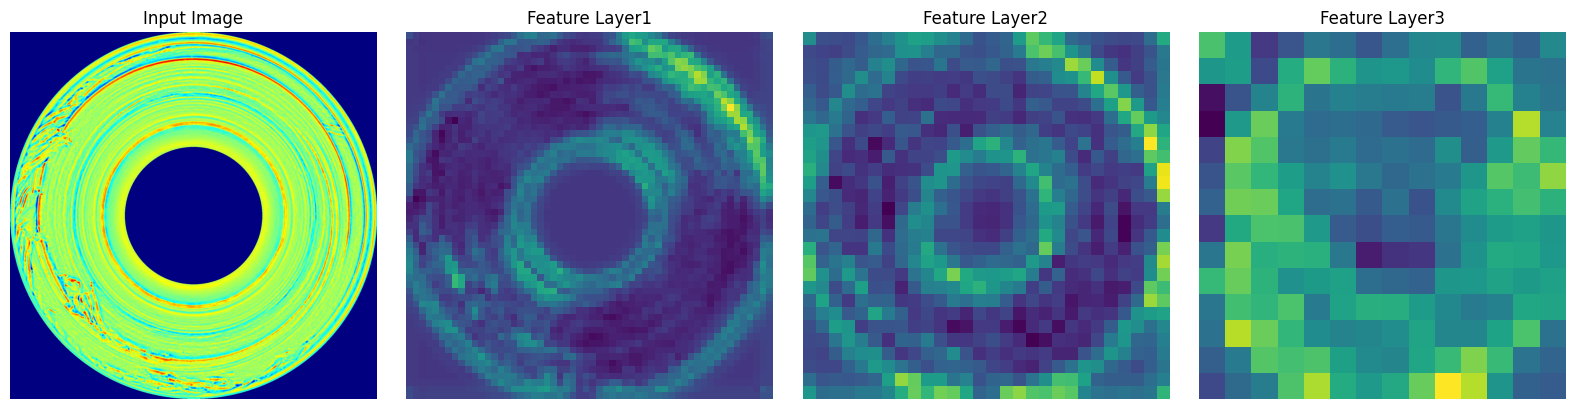

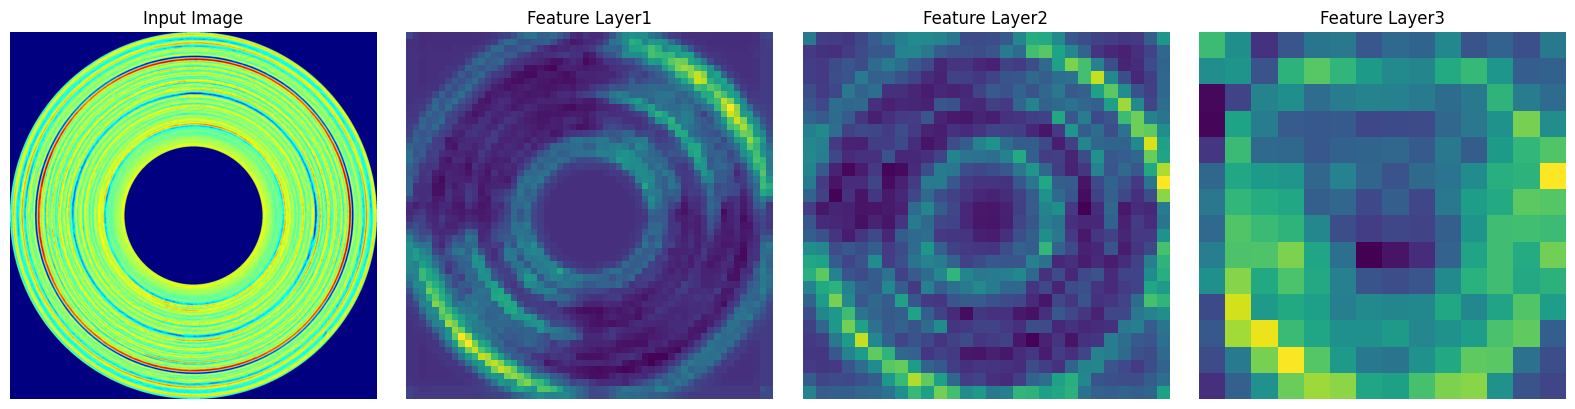

In [2]:
import os
from PIL import Image
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

# 載入你的 ResNet 定義
from resnet import wide_resnet101_2

# 圖片路徑
paths = [
    r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\dataset\btad\one\test\ko\0048.png",
    r"C:\Users\anywhere4090\Desktop\hsnu\DDAD-main\dataset\btad\one\test\good\0008.png"
]

# 預處理：調整大小、正規化
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 載入 pretrained 模型
model = wide_resnet101_2(pretrained=True)
model.eval()

# 將 feature map 轉成 2D 熱圖
def feature_to_image(feature: torch.Tensor):
    # feature: [1, C, H, W]
    fmap = feature[0].cpu()
    fmap_mean = fmap.mean(dim=0)
    fmap_norm = (fmap_mean - fmap_mean.min()) / (fmap_mean.max() - fmap_mean.min() + 1e-8)
    return fmap_norm.numpy()

# 逐張影像處理
for img_path in paths:
    # 讀圖並預處理
    img = Image.open(img_path).convert("RGB")
    x = preprocess(img).unsqueeze(0)  # [1,3,224,224]
    
    # 前向取得三階段特徵
    with torch.no_grad():
        features = model(x)  # 回傳 [feature1, feature2, feature3]
    
    # 顯示原圖 + 三張特徵熱圖
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[0].set_title("Input Image")
    
    for i, feat in enumerate(features, start=1):
        heat = feature_to_image(feat)
        axes[i].imshow(heat, cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f"Feature Layer{i}")
    
    plt.tight_layout()
    plt.show()
